## Exploratory Data Analysis on Netflix Data

<b>Netflix</b> is a streaming service that offers a wide variety of award-winning TV shows, movies, anime and documentaries </br>
Data source: https://www.kaggle.com/datasets/shivamb/netflix-shows

In [81]:
import warnings
warnings.filterwarnings('ignore')

In [82]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing the Data

In [83]:
df = pd.read_csv('netflix_titles.csv')

In [84]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [86]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [87]:
df.describe(include=object)

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


### Movies vs TV Show

Calculating the total number of Movies and TV shows

In [88]:
df.groupby('type')['title'].count()

type
Movie      6131
TV Show    2676
Name: title, dtype: int64

[]

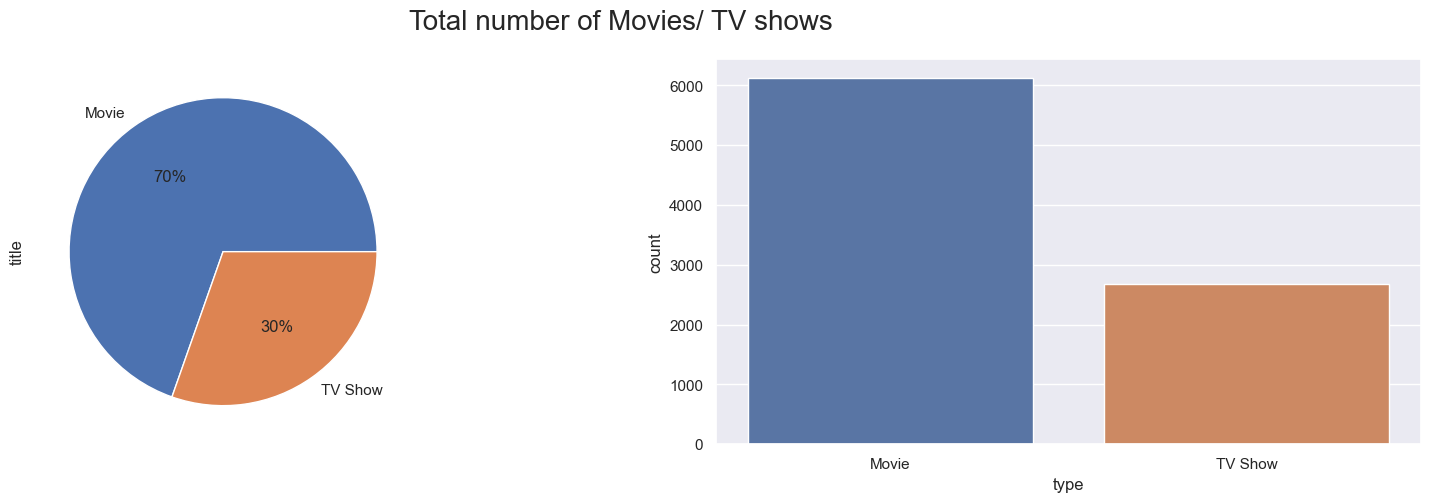

In [89]:
fig = plt.figure(figsize=(20,5))
fig.suptitle('Total number of Movies/ TV shows', fontsize=20)
plt.subplot(121)
colors = sns.color_palette('bright')[0:5]
explode = (0.05, 0.05, 0.05)
df.groupby('type')['title'].count().plot(kind = 'pie', y = 'count',autopct='%1.0f%%')
plt.subplot(122)
sns.countplot(data = df, x = 'type')
plt.plot()

#### Observations
1. Netflix has more movies than TV shows.
2. Around 70% of the Netflix data which we have are of movies data.

### Growth of Movies and TV shows 

In [90]:
# Creating seperate data frames for the Movies and TV shows
movies_df = df.loc[df['type'] == 'Movie']
tvshows_df = df.loc[df['type'] == 'TV Show']

In [91]:
# Selecting only the rows where date_added field is not null
movies_df = movies_df[movies_df['date_added'].notna()]
tvshows_df = tvshows_df[tvshows_df['date_added'].notna()]

In [92]:
# Extracting the year from the date added filed 
movies_df['movie_addedYear'] = movies_df['date_added'].apply(lambda x: str(x).split()[2])
tvshows_df['tvshow_yearAdded'] = tvshows_df['date_added'].apply(lambda x: str(x).split()[2])

In [93]:
movies_df["movie_addedYear"].head()

0     2021
6     2021
7     2021
9     2021
12    2021
Name: movie_addedYear, dtype: object

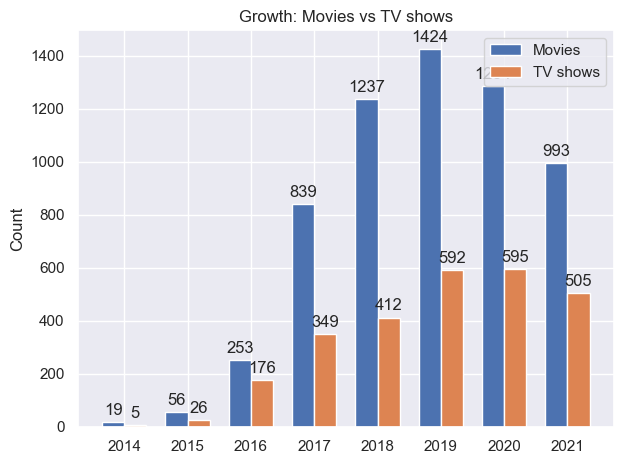

In [94]:
moviesCount = movies_df['movie_addedYear'].value_counts(sort=False).head(8)[::-1]
showsCount = tvshows_df['tvshow_yearAdded'].value_counts(sort=False).head(8)[::-1]
x = np.arange(2014, 2022)
width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, moviesCount, width, label='Movies')
rects2 = ax.bar(x + width/2, showsCount, width, label='TV shows')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count')
ax.set_title('Growth: Movies vs TV shows')
ax.legend()
ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
fig.tight_layout()
plt.show()

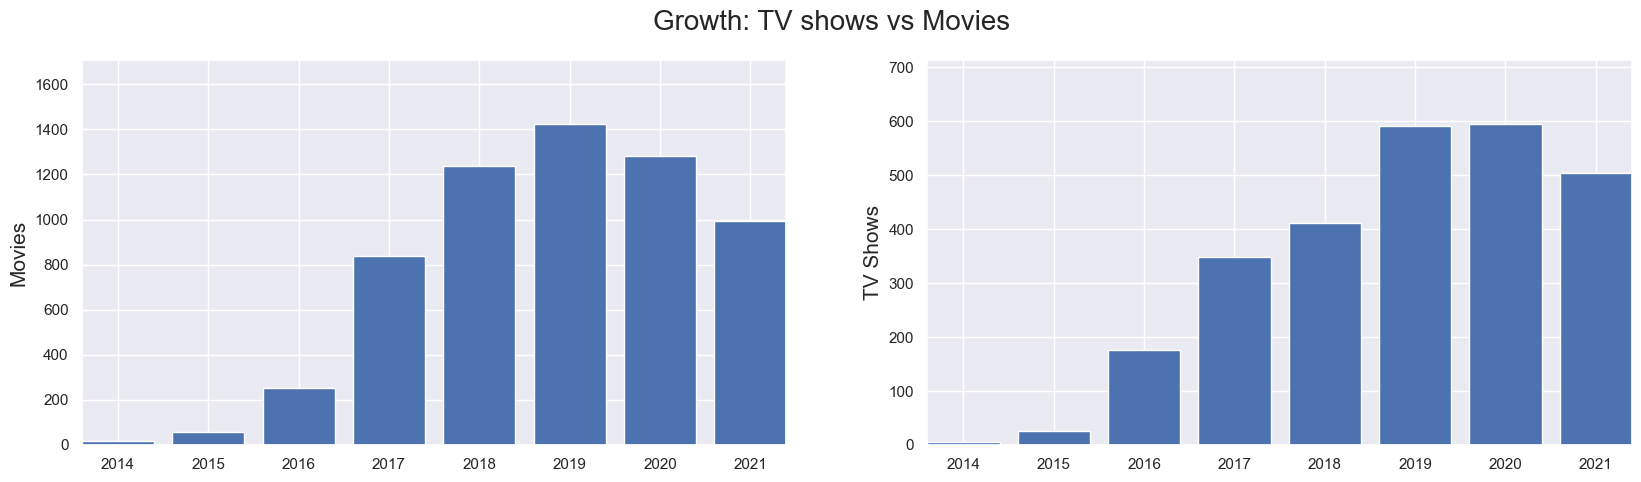

In [95]:
fig = plt.figure(figsize=(20,5))
fig.suptitle('Growth: TV shows vs Movies', fontsize=20)
plt.tick_params(axis='x', rotation=30)

plt.subplot(121)
x = movies_df['movie_addedYear'].value_counts(sort=False).head(8).index[::-1]
y = movies_df['movie_addedYear'].value_counts(sort=False).head(8)[::-1]
bars = plt.bar(x, y)
plt.margins(y=0.2)
plt.margins(x=0)
plt.ylabel('Movies', fontsize=15)

plt.subplot(122)
x = tvshows_df['tvshow_yearAdded'].value_counts(sort=False).head(8).index[::-1]
y = tvshows_df['tvshow_yearAdded'].value_counts(sort=False).head(8)[::-1]
bars = plt.bar(x, y)
plt.margins(y=0.2)
plt.margins(x=0)
plt.ylabel('TV Shows', fontsize=15)

plt.show()

#### Observation
From the above graph, since 2019, there has been a clear trend- Movie shows are declining while TV shows are gaining popularity!

### Directors with most conent in Netflix

In [96]:
directorList = df['director'].apply(lambda x: str(x).split(', ')).tolist()
director_df = pd.DataFrame(directorList, index = df['title'])
director_df = director_df.stack()
director_df = pd.DataFrame(director_df)
director_df.value_counts().head(11)

nan                    2634
Rajiv Chilaka            22
Jan Suter                21
Raúl Campos              19
Suhas Kadav              16
Marcus Raboy             16
Jay Karas                15
Cathy Garcia-Molina      13
Martin Scorsese          12
Youssef Chahine          12
Jay Chapman              12
dtype: int64

#### Observation
Directors with most conent in Netflix are: Rajiv Chilaka, Jan Suter, Raúl Campos, Suhas Kadav,
Marcus Raboy, Jay Karas, Cathy Garcia-Molina, Martin
Scorsese, Youssef Chahine, Jay Chapman

### Actors with most conent in Netflix

In [97]:
actorsList = df['cast'].apply(lambda x: str(x).split(', ')).tolist()
actorsList_df = pd.DataFrame(actorsList, index = df['title'])
actorsList_df = actorsList_df.stack()
actorsList_df = pd.DataFrame(actorsList_df)
actorsList_df.value_counts().head(11)

nan                 825
Anupam Kher          43
Shah Rukh Khan       35
Julie Tejwani        33
Naseeruddin Shah     32
Takahiro Sakurai     32
Rupa Bhimani         31
Om Puri              30
Akshay Kumar         30
Yuki Kaji            29
Amitabh Bachchan     28
dtype: int64

#### Observation
Actors with most content in Netflix are: Anupam Kher, Shah Rukh Khan, Julie Tejwani,
Naseeruddin Shah, Takahiro Sakurai, Rupa Bhimani, Om
Puri, Akshay Kumar, Yuki Kaji, Amitabh Bachchan

### Top Geners present in Netflix

In [98]:
genreList = df['listed_in'].apply(lambda x: str(x).split(', ')).tolist()
genreList_df = pd.DataFrame(genreList, index = df['title'])
genreList_df = genreList_df.stack()
genreList_df = pd.DataFrame(genreList_df)
genreList_df.value_counts().head(15)

International Movies        2752
Dramas                      2427
Comedies                    1674
International TV Shows      1351
Documentaries                869
Action & Adventure           859
TV Dramas                    763
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
TV Comedies                  581
Thrillers                    577
Crime TV Shows               470
Kids' TV                     451
Docuseries                   395
dtype: int64

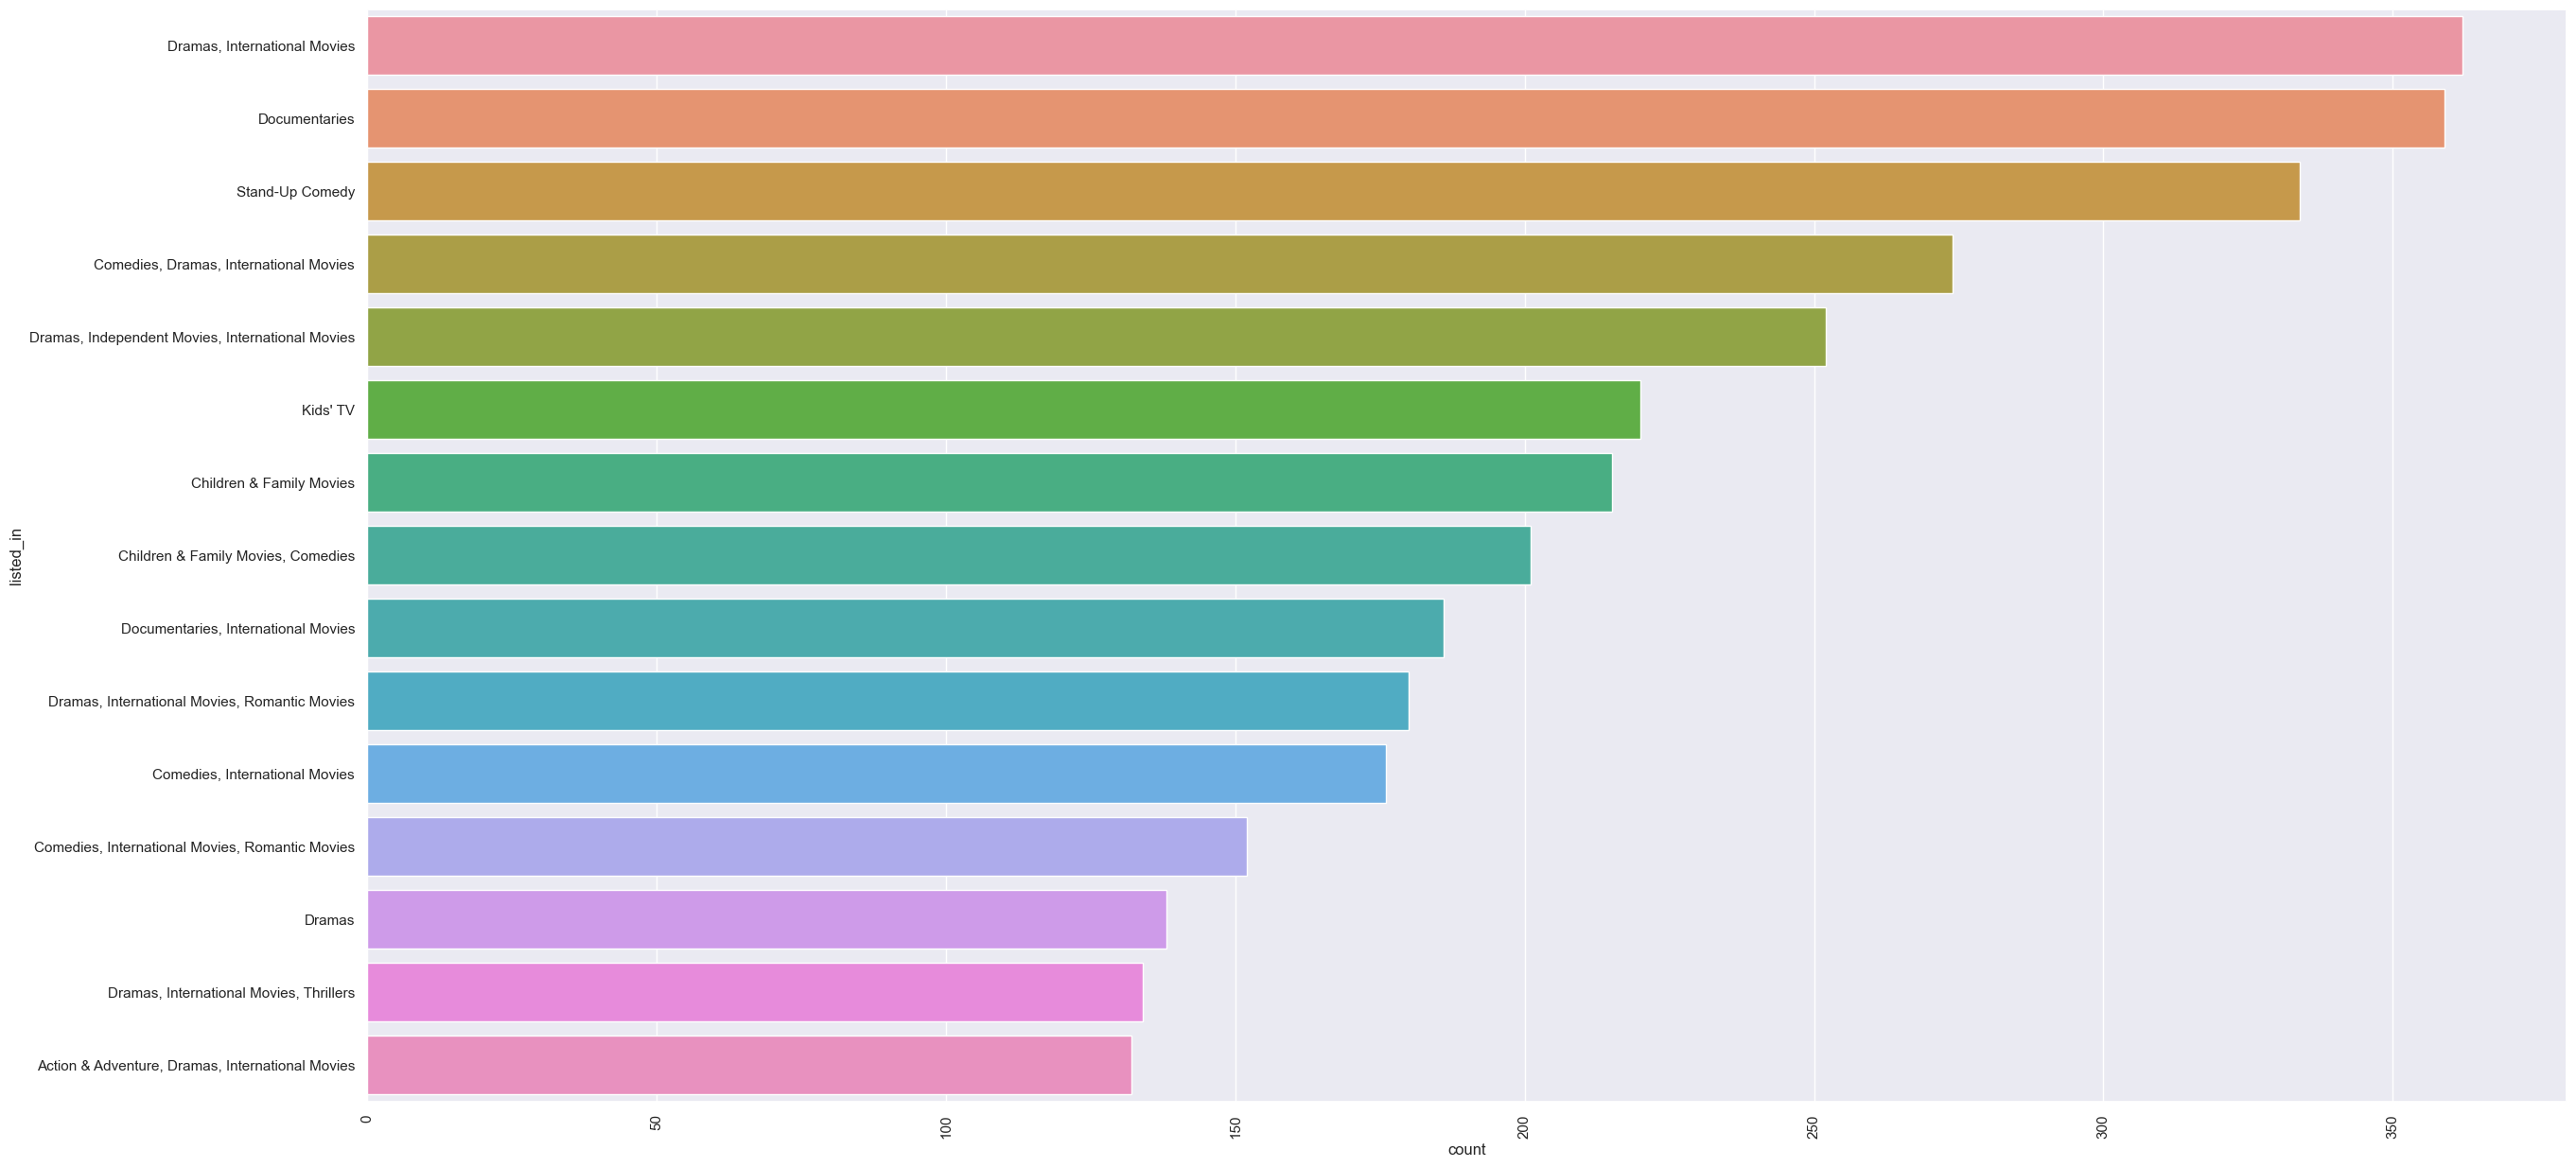

In [99]:
sns.set()
plt.figure(figsize=(30,15))
sns.countplot(y='listed_in',data = df,order =df["listed_in"].value_counts().index[0:15])
plt.xticks(rotation = 90)
plt.show()

#### Observation
1. Dramas, Comedies, International TV Shows are top 3 categories in Netflix
2. Kids shows are not so popular in netflix

### Top Months of release in Netflix

In [103]:
def getMonth(date):
    date = str(date)
    monthVal = date.split(', ')[0]
    month = monthVal.split()[0]
    return month

In [104]:
date_df = df[df['date_added'].notna()]
date_df['monthAdded'] = date_df['date_added'].apply(getMonth)
date_df['yearAdded'] = date_df['date_added'].apply(getYear)

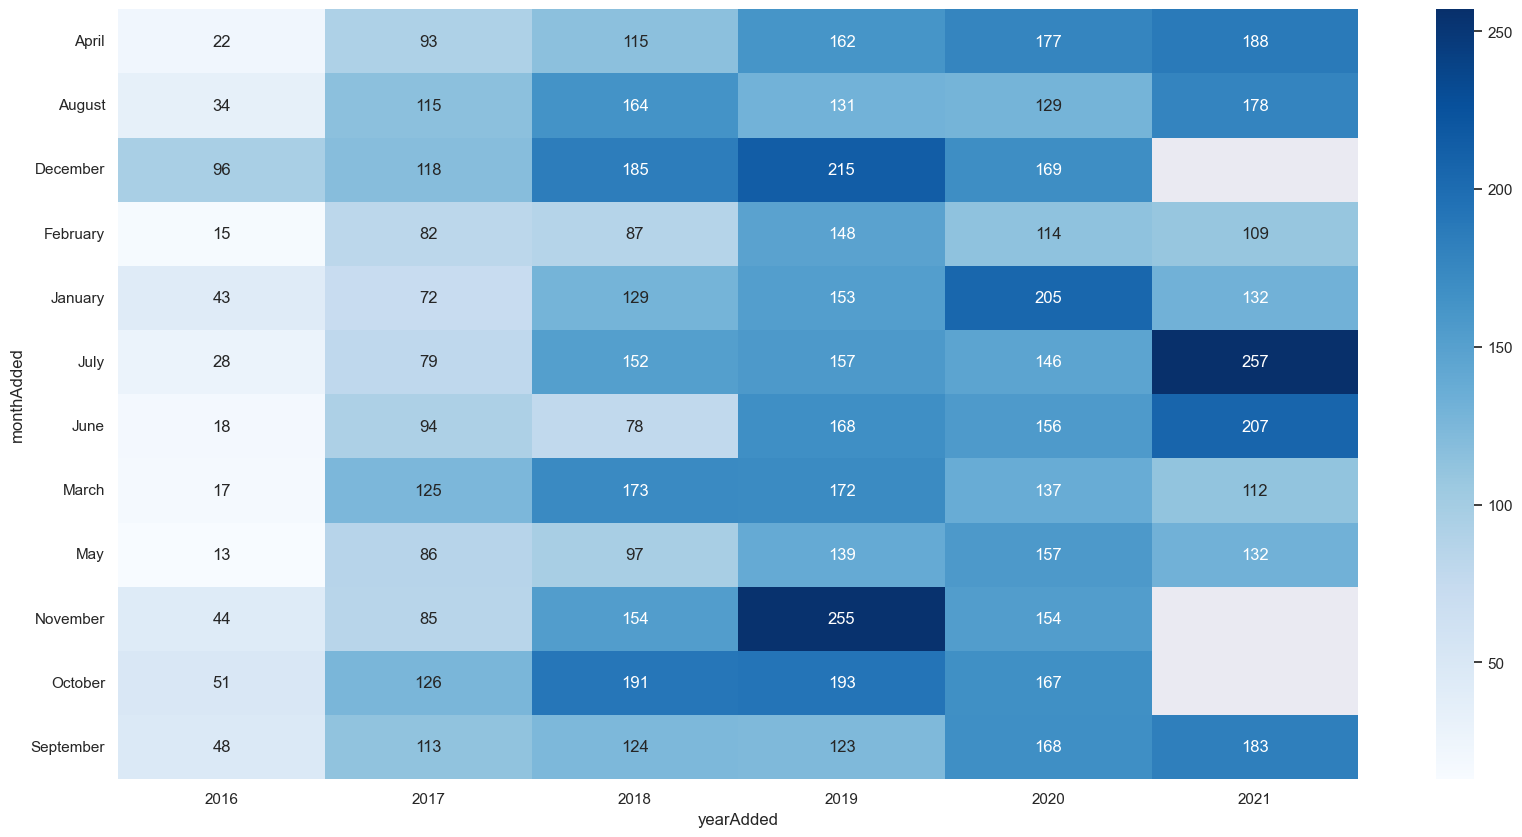

In [107]:
date_df = date_df[date_df['yearAdded'] > '2015']
pt = date_df.pivot_table(index='monthAdded', columns='yearAdded', values='title',aggfunc='count')
plt.figure(figsize=(20,10))
sns.heatmap(pt,cmap='Blues', fmt='g', annot=True)
plt.show()

#### Observation
1. Most of the content are released in November, December, June and July

### Country wise shows 

In [69]:
country_show_count = pd.DataFrame(df["country"].value_counts().reset_index().values,columns=["country","TotalShows"])
country_show_count.head()

,country,TotalShows
0,United States,2818
1,India,972
2,United Kingdom,419
3,Japan,245
4,South Korea,199


#### Observation
1. Most of the content is from USA followed by India, United Kingdom

### Rating of the Movies and TV shows

In [108]:
df["rating"].value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

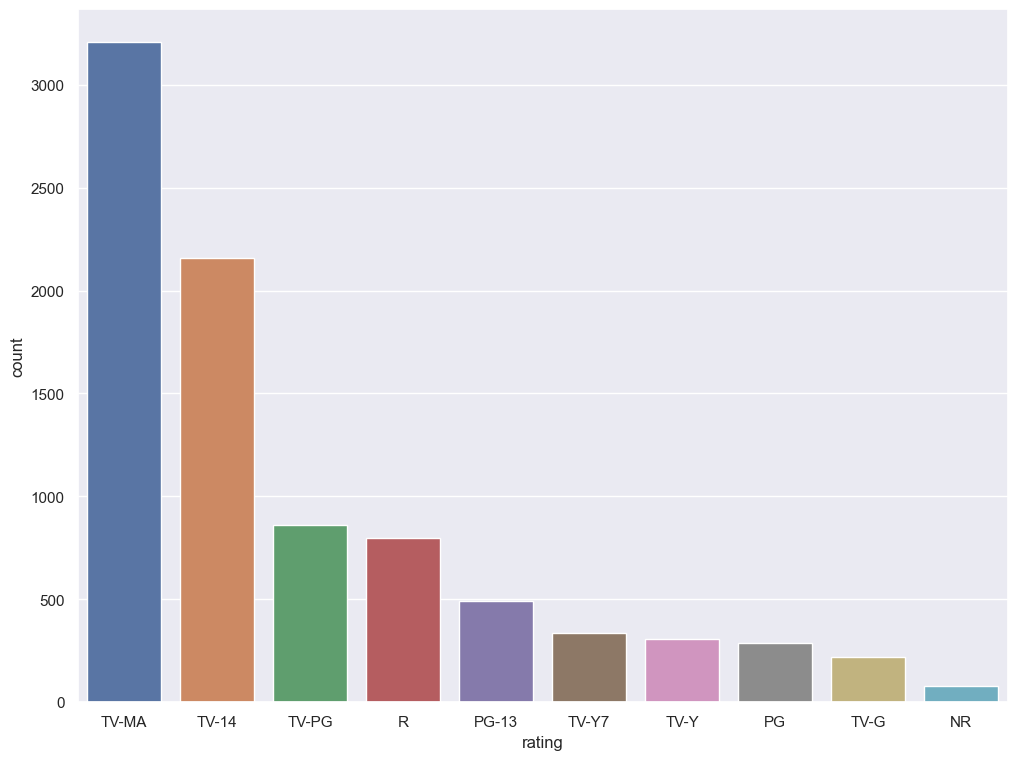

In [110]:
plt.figure(figsize=(12,9))
sns.countplot(x="rating",data=df,order= df['rating'].value_counts().index[0:10])
plt.show()

#### Observation
1. Most common rated contents are TV-MA, TV-14, TV-PG

### EDA Analysis Insights 
1. Netflix has more movies than TV shows.
2. Around 70% of the Netflix data which we have are of movies data.
3. Since 2019, there has been a clear trend- Movie shows are declining while TV shows are gaining popularity!
4. Directors with most conent in Netflix are: Rajiv Chilaka, Jan Suter, Raúl Campos, Suhas Kadav, Marcus Raboy, Jay Karas, Cathy Garcia-Molina, Martin Scorsese, Youssef Chahine, Jay Chapman.
5. Actors with most content in Netflix are: Anupam Kher, Shah Rukh Khan, Julie Tejwani, Naseeruddin Shah, Takahiro Sakurai, Rupa Bhimani, Om Puri, Akshay Kumar, Yuki Kaji, Amitabh Bachchan.
6. Dramas, Comedies, International TV Shows are top 3 categories in Netflix.
7. Kids shows are not so popular in netflix.
8. Most of the content are released in November, December, June and July.
9. Most of the content is from USA followed by India, United Kingdom.
10. Most common rated contents are TV-MA, TV-14, TV-PG.